##faults data 가지고 학습 

In [10]:
#import 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf



In [11]:
#data_load
faults = pd.read_csv('/content/faults.csv')



In [5]:
#min_max normalization 
faults_norm = (faults - faults.min())/(faults.max() -  faults.min())
print(faults_norm)

#데이터 편향 방지를 위한 샘플링 
faults_shuffle = faults_norm.sample(frac = 1)


      X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
0      0.024633   0.026916   0.020352  ...        0.0    0.0           0.0
1      0.378299   0.378584   0.195006  ...        0.0    0.0           0.0
2      0.486217   0.486249   0.119190  ...        0.0    0.0           0.0
3      0.500293   0.500878   0.027938  ...        0.0    0.0           0.0
4      0.756012   0.761849   0.037853  ...        0.0    0.0           0.0
...         ...        ...        ...  ...        ...    ...           ...
1936   0.146041   0.159743   0.024580  ...        0.0    0.0           1.0
1937   0.084457   0.100059   0.025720  ...        0.0    0.0           1.0
1938   0.085044   0.099473   0.029279  ...        0.0    0.0           1.0
1939   0.080352   0.097133   0.032030  ...        0.0    0.0           1.0
1940   0.739589   0.747221   0.006258  ...        0.0    0.0           1.0

[1941 rows x 34 columns]


In [6]:
#numpy 로 변환 
faults_np = faults_shuffle.to_numpy()

In [7]:
#train_test_split
train_ratio = 0.93
input_cnt = 27
output_cnt = 7
train_idx = int(len(faults_np) * train_ratio)
print(train_idx)

1805


In [9]:
#train_test_split
train_x,train_y = faults_np[:train_idx,:-output_cnt],faults_np[:train_idx,-output_cnt:]
test_x ,test_y = faults_np[train_idx: ,:-output_cnt],faults_np[train_idx: , -output_cnt:]




In [19]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 48,activation = 'elu',input_shape = (27,)),
                             tf.keras.layers.Dense(units = 24,activation = 'elu'),
                            tf.keras.layers.Dense(units=12,
                                                  activation = 'elu'),
                            tf.keras.layers.Dense(units=7, #종속 변수 값이랑 똑같아야 함 마지막은
                                                  activation = 'softmax')
])

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = 'categorical_crossentropy')

In [36]:
history = model.fit(train_x,train_y,epochs=200,batch_size=10)


Epoch 1/200
181/181 [==============================] - 0s 2ms/step - loss: 0.6601
Epoch 2/200
181/181 [==============================] - 0s 1ms/step - loss: 0.6609
Epoch 3/200
181/181 [==============================] - 0s 1ms/step - loss: 0.6602
Epoch 4/200
181/181 [==============================] - 0s 1ms/step - loss: 0.6591
Epoch 5/200
181/181 [==============================] - 0s 2ms/step - loss: 0.6592
Epoch 6/200
181/181 [==============================] - 0s 1ms/step - loss: 0.6582
Epoch 7/200
181/181 [==============================] - 0s 2ms/step - loss: 0.6566
Epoch 8/200
181/181 [==============================] - 0s 2ms/step - loss: 0.6568
Epoch 9/200
181/181 [==============================] - 0s 2ms/step - loss: 0.6570
Epoch 10/200
181/181 [==============================] - 0s 1ms/step - loss: 0.6564
Epoch 11/200
181/181 [==============================] - 0s 2ms/step - loss: 0.6559
Epoch 12/200
181/181 [==============================] - 0s 2ms/step - loss: 0.6560
Epoch 13/200


In [26]:
model.evaluate(test_x,test_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.6671


0.6671283841133118

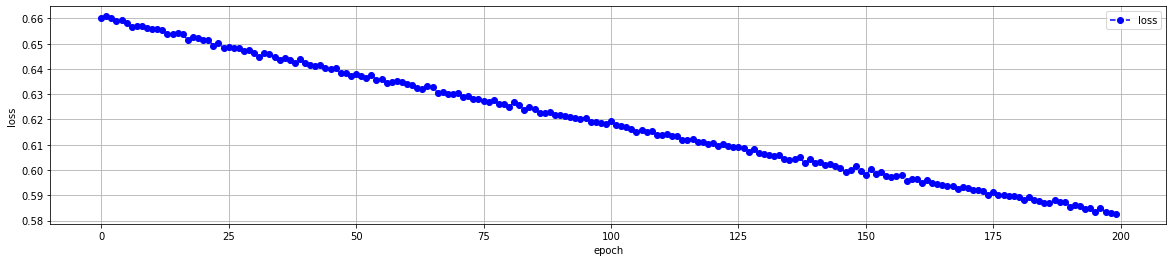

In [37]:
#matplot 시각화 
plt.figure(figsize = (20,4))
plt.plot(history.history['loss'],'--o',color = 'blue',label ='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()


In [30]:
#모델 예측 값 
pred = model.predict(test_x)

#예측값 중에 가장 큰값에 인덱스랑 y_test 의 인덱스를 비교 하여 정확도 측정
print(pred)

pred_y = np.argmax(pred,axis = 1)
print(test_y)
test_yy = np.argmax(test_y,axis = 1)

print(pred_y)

print(test_yy)

[[3.10034454e-02 5.08934783e-04 1.59436036e-04 3.94625327e-04
  2.75123268e-02 3.08964074e-01 6.31457150e-01]
 [2.96783746e-05 9.46358323e-01 1.50048311e-06 3.13969352e-03
  4.29175088e-05 1.68664288e-02 3.35614197e-02]
 [1.42587844e-04 8.74876231e-03 8.98391962e-01 1.25930256e-07
  6.06642132e-08 1.06948940e-02 8.20215791e-02]
 [1.95254310e-04 4.88612743e-04 9.87404346e-01 3.61211896e-08
  8.31170510e-08 1.32731406e-03 1.05844103e-02]
 [4.73821938e-01 6.49199137e-05 1.75531283e-02 1.48915409e-04
  2.03033369e-02 1.83993608e-01 3.04114133e-01]
 [1.36997527e-03 1.53356925e-01 7.74008295e-05 2.10228201e-04
  3.11560882e-03 3.25203866e-01 5.16665936e-01]
 [3.79074305e-01 3.27797636e-04 6.54308606e-05 1.73746361e-04
  2.50912625e-02 3.45671386e-01 2.49596059e-01]
 [7.05289096e-02 1.69957042e-04 1.55225632e-06 1.98645594e-07
  1.81730557e-03 1.93053279e-02 9.08176780e-01]
 [1.73767433e-01 5.71205141e-03 5.10549056e-04 4.72490164e-03
  6.03129983e-01 6.02974370e-02 1.51857704e-01]
 [5.727870

In [33]:
#정확도 측정 
equal = np.equal(pred_y,test_yy)
acc = np.mean(equal)

print('acc {}'.format(acc))

acc 0.7205882352941176
